# Homework 6: Hypothesis Testing and Permutation Testing

## Due Tuesday, May 28th at 11:59PM

Welcome to Homework 6, the last homework of the quarter! This homework covers hypothesis testing ([CIT 11](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)) and permutation testing ([CIT 12](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)).

### Instructions

You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

In [ ]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# import otter
# grader = otter.Notebook()

from IPython.display import IFrame
def show_clt_slides():
    src = 'https://docs.google.com/presentation/d/e/2PACX-1vTcJd3U1H1KoXqBFcWGKFUPjZbeW4oiNZZLCFY8jqvSDsl4L1rRTg7980nPs1TGCAecYKUZxH5MZIBh/embed?start=false&loop=false&delayms=3000&rm=minimal'
    width = 700
    height = 370
    display(IFrame(src, width, height))

## 1. Was it by Random Chansey? 🎲

<img src='images/chansey.png' width='250'>

In [ ]:
!pip install babypandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


You recently decided to buy the video game *Pokémon Yellow* from someone on Ebay. The seller tells you that they've modified the game so that the probabilities of encountering certain Pokémon in certain locations have been altered. However, the seller doesn't tell you which specific locations have had their probability models changed and what they've been changed to.

As you are playing *Pokémon Yellow*, you arrive at the Safari Zone, one of the most iconic locations in the game. You're curious as to your chances of encountering your favorite Pokémon, Chansey, in this location. You go onto [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Kanto_Safari_Zone#Area_1) to find the probability model for this location, and you discover that for each Pokémon encounter in the Safari Zone, there is a 4% chance of encountering Chansey.

After a few hours of gameplay in the Safari Zone, you have encountered Chansey **48 times out of 821 total Pokémon encounters**, which is almost 6% of the time! You start to suspect that the Safari Zone may have been one of the locations in which the previous owner of the game changed the probability model.

To test this, you decide to run a hypothesis test with the following hypotheses:

**Null Hypothesis**: In your copy of *Pokémon Yellow*, the probability of encountering Chansey at each Pokémon encounter in the Safari Zone is 4%.

**Alternative Hypothesis**: In your copy of *Pokémon Yellow*, the probability of encountering Chansey at each Pokémon encounter in the Safari Zone is greater than 4%.

**Question 1.1.** Complete the implementation of the function `one_simulation`, which has no arguments. It should randomly generate 821 Pokémon encounters in the Safari Zone and return the **proportion** of encountered Pokémon that were Chansey.

***Hint:*** Use `np.random.multinomial`. You don't need a `for`-loop.

In [ ]:
def one_simulation():
    return (np.random.multinomial(821,[.04,.96]) / 821)[0]

one_simulation()

0.031668696711327646

In [ ]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** The test statistic for our hypothesis test will be the difference between the proportion of Chansey encounters in a given sample of 821 Safari Zone encounters and the expected proportion of Chansey encounters, i.e.

$$\text{test statistic} = \text{proportion of Chansey encounters in sample} - 0.04$$


Let's conduct 10,000 simulations. Create an array named `proportion_diffs` containing 10,000 simulated values of the test statistic described above. Utilize the function created in the previous question to perform this task.

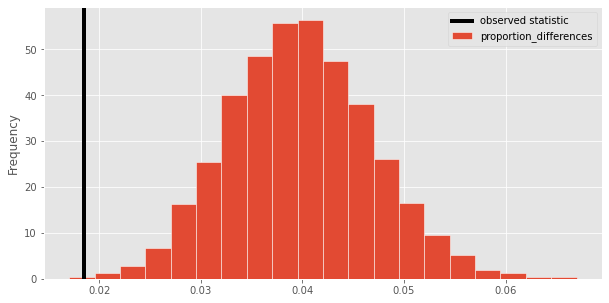

In [ ]:
proportion_diffs = np.array([])

for i in np.arange(10000):
    new_count = one_simulation()
    proportion_diffs = np.append(proportion_diffs, new_count)


# Visualize with a histogram. Don't change anything below.
bpd.DataFrame().assign(proportion_differences=proportion_diffs).plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5));
plt.axvline(x=(48 / 821 - 0.04), color='black', linewidth=4, label='observed statistic')
plt.legend();

In [ ]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Calculate the p-value for this hypothesis test, and assign the result to `safari_zone_p`.

***Hint:*** Do large values of our test statistic favor the alternative hypothesis, or do small values of our test statistic favor the alternative hypothesis?

<h1> wat does the hint mean <h1>

In [ ]:
safari_zone_p = 48 / 821 - 0.04
safari_zone_p

0.018465286236297195

In [ ]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Using the standard p-value cutoff of 0.05, what can we conclude from our hypothesis test? Assign either 1, 2, 3, or 4 to the variable `safari_zone_conclusion`, corresponding to the best conclusion.
   
   1. We reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.
   1. We reject the null hypothesis. The observed data is inconsistent with the model.
   1. We accept the null hypothesis. The observed data is consistent with the model.
   1. We fail to reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.

<h1> the model being in this case the default proability of<br>
the pokemon showing<h1>

In [ ]:
safari_zone_conclusion = 2

In [ ]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** In this question, we chose as our test statistic the proportion of Chansey encounters in the Safari Zone minus 0.04. But this is not the only statistic we could have chosen; there are many that could have worked here.

From the options below, choose the test statistic that would **not** have worked for this hypothesis test, and assign 1, 2, 3, or 4 to the variable `bad_choice`.

1. The number of Chansey encounters out of 821 enounters in the Safari Zone.
1. The proportion of Chansey encounters in the Safari Zone.
1. 0.04 minus the proportion of Chansey encounters in the Safari Zone.
1. The absolute difference between 0.04 and the proportion of Chansey encounters in the Safari Zone.

***Hint:*** Our goal is to find a test statistic that will help us determine whether we encounter Chansey **more** often than expected.

<h1>wats the difference between 1 & 2<h1>

In [ ]:
bad_choice = 3
bad_choice

1

In [ ]:
grader.check("q1_5")

q1_5 results: All test cases passed!

## 2. <span>Tetris Blocks</span> 📱

<img src='images/tetris.png' width='300'>

Tetris is a classic video game where the player moves differently shaped puzzle pieces in an attempt to fit them neatly together in order to clear rows and prevent the board from filling up. The longer you can stop your board from filling up, the higher your score. There are seven unique shapes, each composed of four squares arranged in different shapes. The official name for this type of block is a [tetromino](https://en.wikipedia.org/wiki/Tetromino)!

<img src='images/tetris-blocks.webp' width='600'>

The seven types of blocks used in Tetris include: `'I-block'`, `'J-block'`, `'L-block'`, `'O-block'`, `'S-block'`, `'T-block'`, and `'Z-block'`. The most coveted block is the `'I-block'`, which can clear several rows at once *if* it appears at the appropriate time. Unfortunately, there is no publicly available information on the exact probabilities of getting any of the seven block types during a game of Tetris. <mark>However, our DSC 10 tutor Daniel plays Tetris a lot, and based on his experience with the game, he proposes the following probability distribution.<mark>

<h1>based on what exactly how did daniel ACTUALLY get these numbers<h1>

| Type | Daniel's Estimated Probability|
| --- | --- |
| I-block | $0.14$ |
| J-block | $0.15$ |
| L-block | $0.12$ |
| O-block | $0.18$ |
| S-block | $0.15$ |
| T-block | $0.14$ |
| Z-block | $0.12$ |

We'll store this distribution in an array, in the order shown above.

In [ ]:
# Just run this cell, do not change it!
daniel_dist = np.array([0.14, 0.15, 0.12, 0.18, 0.15, 0.14, 0.12])
daniel_dist

array([0.14, 0.15, 0.12, 0.18, 0.15, 0.14, 0.12])

To assess the validity of Daniel's model, you collect data from many Tetris players. You learn that in total, out of 2,902 Tetris pieces placed:
- 415 were `'I-block'`,
- 462 were `'J-block'`,
- 367 were `'L-block'`,
- 539 were `'O-block'`,
- 413 were `'S-block'`,
- 358 were `'T-block'`,
- the rest were `'Z-block'`.

You then calculate the **empirical** type distribution using the data you collected and store it in an array as well (in the same order as before):

In [ ]:
# Just run this cell, do not change it!
empirical_dist = np.array([415, 462, 367, 539, 413, 358, 2902 - (415 + 462 + 367 + 539 +413 + 358)]) / 2902
empirical_dist

array([0.14300482, 0.15920055, 0.12646451, 0.18573398, 0.14231564,
       0.1233632 , 0.1199173 ])

While `empirical_dist` is not identical to `daniel_dist`, it's still possible that Daniel's model is plausible, and that the observed differences are due to random chance. Let's run a hypothesis test to investigate further, using the following hypotheses:

**Null Hypothesis**: The types of Tetris blocks are drawn randomly from the distribution `daniel_dist`.

**Alternative Hypothesis**: The types of Tetris blcoks are _not_ drawn randomly from the distribution `daniel_dist`.

Note that this hypothesis test involves seven proportions, one for each block shape.

**Question 2.1.**  Which of the following is **not** a reasonable choice of test statistic for this hypothesis test? Assign 1, 2, or 3 to the variable `unreasonable_test_statistic`.
1. The sum of the absolute difference between the proposed distribution (Daniel's expected proportion of types) and the empirical distribution (actual proportion of types).
1. The absolute difference between the sum of the proposed distribution (Daniel's expected proportion of types) and the sum of the empirical distribution (actual proportion of types).
1. Among all seven Tetris block types, the largest absolute difference between Daniel's expected proportion and the actual proportion of blocks of that type.

In [ ]:
unreasonable_test_statistic = 3

In [ ]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** We'll use the TVD, i.e. **total variation distance**, as our test statistic. Below, complete the implementation of the function `total_variation_distance`, which takes in two distributions (stored as arrays) as arguments and returns the total variation distance between the two arrays.

Then, use the function `total_variation_distance` to determine the TVD between the type distribution proposed by Daniel and the empirical type distribution you observed. Assign this TVD to `observed_tvd`.

In [ ]:
x,y = np.array([0,-1,1]),np.array([3,-4,0])
print(abs(x - y))

[3 3 1]


In [ ]:
def total_variation_distance(first_distrib, second_distrib):
    '''Computes the total variation distance between two distributions.'''
    return sum(abs(first_distrib - second_distrib)) / 2

observed_tvd = total_variation_distance(daniel_dist, empirical_dist)
observed_tvd
# sum(observed_tvd)

0.024403859407305308

<mark>why was this version wrong <mark>

In [ ]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Now, we'll calculate 5,000 simulated TVDs to see what a typical TVD between the proposed distribution and an empirical distribution would look like if Daniel's model were accurate. Since our real-life data includes 2,902 Tetris blocks, in each trial of the simulation, we'll:
- draw 2,902 Tetris blocks at random from Daniel's proposed distribution, then
- calculate the TVD between **Daniel's proposed type distribution** and the **empirical type distribution from the simulated sample**.

Store these 5,000 simulated TVDs in an array called `simulated_tvds`.

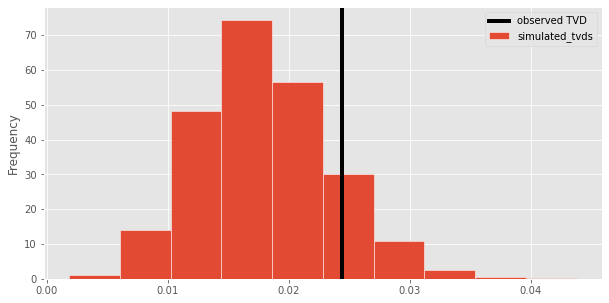

In [ ]:
simulated_tvds = np.array([])

for i in np.arange(5000):
    sample_distribution = np.random.multinomial(2902, daniel_dist) / 2902
    new_tvd = total_variation_distance(sample_distribution, daniel_dist)
    simulated_tvds = np.append(simulated_tvds, new_tvd)
# Visualize the distribution of TVDs with a histogram
bpd.DataFrame().assign(simulated_tvds=simulated_tvds).plot(kind='hist', density=True, ec='w', figsize=(10, 5));
plt.axvline(x=observed_tvd, color='black', linewidth=4, label='observed TVD')
plt.legend();

In [ ]:
grader.check("q2_3")

**Question 2.4.** Now, determine the p-value for our test by finding the proportion of times in our simulation that we saw a TVD greater than or equal to our observed TVD. Assign your result to `tetris_p`.

In [ ]:
tetris_p = observed_tvd
tetris_p

0.024403859407305308

In [ ]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<h1>does this choosen need to be higher or lower<h1>

**Question 2.5.** Using the standard p-value cutoff of 0.05, what can we conclude from our hypothesis test? Assign either 1, 2, 3, or 4 to the variable `tetris_conclusion`, corresponding to the best conclusion.
   
   1. We accept the null hypothesis. The observed data is consistent with the model.
   1. We reject the null hypothesis. There is not enough evidence to say if the observed data is consistent with the model.
   1. We reject the null hypothesis. The observed data is inconsistent with the model.
   1. We fail to reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.

In [ ]:
tetris_conclusion = 4
tetris_conclusion

4

In [ ]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Award-Winning Anime 🐱‍👤🏆
<img src='images/attack-on-titan.jpg' width='1000'>

The `animes.csv` dataset from [Kaggle](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset?resource=download) contains more than 10,000 anime TV series, movies, and OVAs (original video animations). See if your favorite anime is in there!

The data contains six columns: `'Name'`, `'English name'`, `'Episodes'`, `'Aired'`, `'Genres'`, `'Score'`. Let's read it in and store it as a DataFrame named `anime`.

| Column | Description |
| --- | --- |
| `'Name'` | The name of the anime in its original language |
| `'English name'` | The English name of the anime |
| `'Episodes'` | The number of episodes in the anime |
| `'Aired'` | The dates when the anime was aired |
| `'Genres'` | The genres of the anime, separated by commas |
| `'Score'` | The score given to the anime |

In [ ]:
anime = bpd.read_csv("/content/sample_data/data/animes.csv")
anime

,Name,English name,Episodes,Aired,Genres,Score
0,Cowboy Bebop,Cowboy Bebop,26,"Apr 3, 1998 to Apr 24, 1999","Action, Award-Winning, Sci-Fi",8.75
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,1,"Sep 1, 2001","Action, Sci-Fi",8.38
2,Trigun,Trigun,26,"Apr 1, 1998 to Sep 30, 1998","Action, Adventure, Sci-Fi",8.22
3,Witch Hunter Robin,Witch Hunter Robin,26,"Jul 3, 2002 to Dec 25, 2002","Action, Drama, Mystery, Supernatural",7.25
4,Bouken Ou Beet,Beet the Vandel Buster,52,"Sep 30, 2004 to Sep 29, 2005","Adventure, Fantasy, Supernatural",6.94
...,...,...,...,...,...,...
11435,One Piece: Dai Gekisen Tokushuu! Zoro vs. Ooka...,One Piece: Recapping Fierce Fights! Zoro vs. a...,1,"May 14, 2023","Action, Adventure, Comedy, Fantasy",6.47
11436,Gensou Mangekyou: The Memories of Phantasm,Touhou Fantasy Kaleidoscope: The Memories of P...,18,"Aug 12, 2011 to May 7, 2023",Fantasy,7.78
11437,Mashle: Mash Burnedead to Fushigi na Tegami,Mashle: Magic and Muscles - Mash Burnedead and...,1,"May 20, 2023","Action, Comedy, Fantasy",5.84
11438,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,Lee's Detective Agency: A Day in Lungmen - Hom...,1,"Oct 24, 2021","Action, Comedy, Mystery",5.99


Notice that some rows of the DataFrame preview above, such as the first row for `'Cowboy Bebop'`, include `'Award-Winning'` in the `'Genres'` column. This means the anime won an award, such as the Crunchyroll Anime Award. In 2024, this award was given to  *Jujutsu Kaisen* in case you want to check it out.

In this section, we will explore whether the scores for award-winning animes come from the same distribution as non-winning animes.

In [ ]:
def label_award(genres_str):
  """
  Takes a string of genres associated with a single row of anime and returns either 'Award-Winning' or 'No Award'.

  Args:
    genres_str: A string containing genres associated with a single row of anime.

  Returns:
    A string, either 'Award-Winning' or 'No Award'.
  """
  genres_list = genres_str.split(',')
  award_genres = ['Slice of Life', 'Drama', 'Comedy', 'Romance', 'Music', 'Sports', 'Mystery']
  for genre in genres_list:
    if genre in award_genres:
      return 'Award-Winning'
  return 'No Award'

# Create a new DataFrame with an additional column named 'Award_Status'
animes_labeled = animes.copy()
animes_labeled['Award_Status'] = animes_labeled['Genres'].apply(label_award)

# Display the first five rows of the new DataFrame
animes_labeled.head()

sample_data


In [ ]:
genres_list = anime['Genres'].str.split(',').explode()

# Get the unique values from the exploded list
unique_genres = genres_list.unique()

# Print the unique genres
print(unique_genres)

IndexError: BabyPandas only accepts Boolean objects when indexing against the data frame; please use .get to get columns, and .loc or .iloc for more complex cases.

**Question 3.1.** Complete the implementation of the function `label_award`, which takes in a string of genres associated with a single row of `anime` and returns either `'Award-Winning'` or `'No Award'`.

Once you've done that, use your function to help you create a new DataFrame named `anime_labeled` that has all the same columns as `anime`, in the same order, with an additional column named `'Award_Status'` that contains whether the anime is award-winning. The `'Award_Status'` column should contain only two distinct values: `'Award-Winning'` and `'No Award'`.

<h1>GRRRR IT\SSSS ALPHABETTICALLLLLL!!!!!!

In [ ]:
anime = anime.assign(label_award=anime.get("Genres"))

In [ ]:
empty = np.array([])

TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
def label_award(genres):
    genre_per_show = (genres).split(', ')
    bpd.Series
    for i in genre_per_show:
        if (i) == "Award-Winning":
            np.append(,"Award-Winning")
        else:
            np.append(label_award="No Award")
    return todo_merge = (
    bpd.DataFrame()
    .assign(
        City=['Fresno', 'LA', 'SD', 'SF', 'SJ']

        )
)

anime_labeled = anime.get("Genres").apply(label_award)
anime_labeled

ValueError: New column does not have the same length as existing DataFrame

In [ ]:
empty = (
    bpd.DataFrame()
    .assign(
        City=['Fresno', 'LA', 'SD', 'SF', 'SJ']
        )
)

In [ ]:
grader.check("q3_1")

q3_1 results:
    q3_1 - 1 result:
        Trying:
            anime_labeled.shape == (11440, 7)
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_1 0
        Failed example:
            anime_labeled.shape == (11440, 7)
        Expected:
            True
        Got:
            False

    q3_1 - 2 result:
        Trying:
            list(anime_labeled.columns) == ['Name', 'English name', 'Episodes', 'Aired', 'Genres', 'Score', 'Award_Status'] # Name the new column 'Award_Status'
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_1 1
        Failed example:
            list(anime_labeled.columns) == ['Name', 'English name', 'Episodes', 'Aired', 'Genres', 'Score', 'Award_Status'] # Name the new column 'Award_Status'
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q3_1 1[0]>", line 1, in <module>
                list(anime_labeled.columns) == ['Name', 'English name', 'Episodes', 'Aired', 'Genres', 'Score', 'Award_Status'] # Name the new column 'Award_Status'
            AttributeError: 'Series' object has no attribute 'columns'

    q3_1 - 3 result:
        Trying:
            np.all(anime_labeled.get('Award_Status').unique() == np.array(['Award-Winning', 'No Award']))  # Make sure the new column's values are either `Award-Winning` or `No Award`
        Expecting:
            True
        **********************************************************************
        Line 1, in q3_1 2
        Failed example:
            np.all(anime_labeled.get('Award_Status').unique() == np.array(['Award-Winning', 'No Award']))  # Make sure the new column's values are either `Award-Winning` or `No Award`
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q3_1 2[0]>", line 1, in <module>
                np.all(anime_labeled.get('Award_Status').unique() == np.array(['Award-Winning', 'No Award']))  # Make sure the new column's values are either `Award-Winning` or `No Award`
            AttributeError: 'NoneType' object has no attribute 'unique'

**Question 3.2.** Using the DataFrame `anime_labeled`, calculate the difference between the **mean** `'Score'` of award-winning animes and non-winning animes. Assign your answer to `observed_difference`.

$$\text{observed difference} = \text{mean award-winning anime score} - \text{mean non-winning anime score}$$

In [ ]:
observed_difference = ...
observed_difference

In [ ]:
grader.check("q3_2")

**Question 3.3.** What does the number you obtained for `observed_difference` mean? Assign `interpretation` to 1, 2, 3, or 4, corresponding to the best explanation below.

1. In our sample, the mean award-winning anime score is higher than the mean non-winning anime score by about 82 percent.
1. In our sample, the mean award-winning anime score is higher than the mean non-winning anime score by about 0.82 percent.
1. In our sample, the mean award-winning anime score is higher than the mean non-winning anime score by about 0.82 points.
1. In our sample, the mean non-winning anime score is higher than the mean award-winning anime score by about 82 percent.
1. In our sample, the mean non-winning anime score is higher than the mean award-winning anime score by about 0.82 percent.
1. In our sample, the mean non-winning anime score is higher than the mean award-winning anime score by about 0.82 points.

In [ ]:
interpretation = ...

In [ ]:
grader.check("q3_3")

Now we want to conduct a **permutation test** to see if it is by chance that the average score for award-winning animes is higher than the average score of non-winning animes in our sample, or if award-winning animes actually have a higher score on average than non-winning animes.

- **Null Hypothesis**: The scores of award-winning animes and non-winning animes come from the same distribution.  
- **Alternative Hypothesis**: The scores of award-winning animes are higher on average than the scores of non-winning animes.

**Question 3.4.** Assign `reduced_df` to a DataFrame with only two columns, `'Award_Status'` and `'Score'`, since these are the only relevant columns in `anime_labeled` for this permutation test.

<!--
BEGIN QUESTION
name: q3_4
-->

In [ ]:
reduced_df = ...
reduced_df

In [ ]:
grader.check("q3_4")

**Question 3.5.** Run a permutation test to see if the `observed_difference` is a statistically significant difference. To run this permutation test, simulate 1000 values of the test statistic. For each test statistic, shuffle the `'Award_Status'` column of `reduced_df` and calculate the difference in mean score (award-winning minus non-winning). Store your 1000 differences in the `differences` array. Be sure not to shuffle the `'Score'` column.

***Hint:*** It's a good idea to simulate one value of the test statistic before putting everything in a for-loop.

In [ ]:
differences = ...

# Just display the first ten differences.
differences[:10]

In [ ]:
grader.check("q3_5")

**Question 3.6.** Compute a p-value for this hypothesis test and assign your answer to `anime_p`. To decide whether to use `<=` or `>=` in the calculation of the p-value, think about whether larger values or smaller values of our test statistic favor the alternative hypothesis.

In [ ]:
anime_p = ...
anime_p

In [ ]:
grader.check("q3_6")

**Question 3.7.** Assign the variable `anime_conclusion` to a **list** of all the true statements below.

1. We accept the null hypothesis at the 0.01 significance level.
1. We reject the null hypothesis at the 0.01 significance level.
1. We fail to reject the null hypothesis at the 0.01 significance level.
1. We accept the null hypothesis at the 0.05 significance level.
1. We reject the null hypothesis at the 0.05 significance level.
1. We fail to reject the null hypothesis at the 0.05 significance level.

In [ ]:
anime_conclusion = ...

In [ ]:
grader.check("q3_7")

**Question 3.8.** Suppose in this question you had shuffled the `'Score'` column instead and kept the `'Award_Status'` column in the same order. Assign `shuffled_score` to either 1, 2, 3, or 4, corresponding to the true statement below.


1. The new p-value from shuffling `'Score'` would be $1 - p$, where $p$ is the old p-value from shuffling `'Award_Status'` (i.e. your answer to Question 3.6).
1. We would need to change our null hypothesis in order to shuffle the `'Score'` column.
1. There would be no difference in the conclusion of the test if we had shuffled the `'Score'` column instead.
1. The `'Score'` column cannot be shuffled because it contains numbers.

In [ ]:
shuffled_score = ...

In [ ]:
grader.check("q3_8")

**Question 3.9.** Which of the following choices best describes the purpose of shuffling one of the columns in our dataset in a permutation test? Assign `why_shuffle` to either 1, 2, 3, or 4, corresponding to the true statement below.

1. Shuffling mitigates noise in our data by generating new permutations of the data.
1. Shuffling is a special case of bootstrapping and allows us to produce interval estimates.
1. Shuffling allows us to generate new data under the null hypothesis, which we can use in testing our hypothesis.
1. Shuffling allows us to generate new data under the alternative hypothesis, which helps us identify when the data come from different distributions.

In [ ]:
why_shuffle = ...

In [ ]:
grader.check("q3_9")

## 4. New York Times Mini Crossword 🧩🕐
<img src='images/nyt_mini_crossword.png' width='500'>

[The New York Times Mini Crossword](https://www.nytimes.com/crosswords/game/mini) is a smaller and quicker version of the traditional crossword puzzle. It features straightforward clues and is designed to be completed in a few minutes. After completeing the puzzle, players have the option to send the time it took to complete the puzzle to their friends, to try to compete for the lowest time.

Ciro and Athu have been playing the New York Times Mini Crossword for a couple months, often sending each other the time it takes for them to complete each puzzle. Today, Ciro's time was much faster than Athu's so he bragged that he is better than Athu at the game. Athu vehemently disagrees and thinks that they are equally skilled.

Since the two of them have learned about hypothesis testing in DSC10, they decided to look at their history of times to determine if they were equally skilled or if one of them was better than the other.

Let's look at all the data that they collected. Each entry in the `'Time'` column represents the amount of time it took in seconds for one person to complete the New York Times Mini Crossword on a single day. There are 40 times for Ciro and 40 times for Athu.

In [ ]:
mini_cw = bpd.read_csv('data/mini-crossword.csv')
mini_cw

,Name,Time
0,Ciro,103
1,Athu,51
2,Ciro,76
3,Athu,153
4,Ciro,85
...,...,...
75,Athu,116
76,Ciro,111
77,Athu,89
78,Ciro,102


81.325

**Question 4.1.** Now let's address the question: how does the average time for Ciro to complete the crossword compare to Athu's average time? Create a DataFrame called `ciro` that contains only the times for Ciro, and set `ciro_mean` to the mean time to complete the crossword for Ciro. Similarly, create a DataFrame `athu` for Athu and compute `athu_mean`. Finally, set `observed_diff_mean`, to the difference in mean times to complete the crossword in our sample, computed as follows.

$$\text{difference} = \text{mean time to complete the crossword for Ciro} - \text{mean time to complete the crossword for Athu}$$


In [ ]:
ciro = mini_cw[mini_cw.get("Name") == "Ciro"]
athu = mini_cw[mini_cw.get("Name") == "Athu"]
ciro_mean = ciro.get("Time").mean()
athu_mean = athu.get("Time").mean()
observed_diff_mean = ciro_mean - athu_mean
observed_diff_mean

-28.25

In [ ]:
grader.check("q4_1")

q4_1 results: All test cases passed!

If you answered Question 4.1 correctly, you should have noticed a difference in the average times between Ciro and Athu. But we only have a small sample of their performance on the Mini Crossword, so it's possible that this difference is merely a result of the specific samples we happened to collect. Let's do a **hypothesis test** to find out if there's actually a difference in their abilities. We'll state our hypotheses as follows:

- **Null Hypothesis**: The average time it takes to complete the New York Times Mini Crossword is the same for both Ciro and Athu. In other words, their difference in average time is equal to 0 seconds.

- **Alternative Hypothesis**: The average time it takes to complete the New York Times Mini Crossword is not the same for both Ciro and Athu. In other words, the difference in average time between the two of them is not equal to 0 seconds.


Since we are able to frame our hypothesis test as a question of whether a certain population parameter – the difference in average times – is equal to a specific value, we can **test our hypotheses by constructing a confidence interval** for this parameter. For a refresher on this method, refer to [CIT 13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) or the human body temperature example from [Lecture 22](https://dsc10.com/resources/lectures/lec22/lec22.html).

***Note:*** We are **not** conducting a permutation test here, although that would also be a valid approach to test these hypotheses.

**Question 4.2.** Compute 1000 **bootstrapped estimates** for the difference in average times between Ciro and Athu. As in Question 4.1, calculate the difference as Ciro minus Athu. Store your 1000 estimates in the `difference_means` array.

You should generate your Ciro resamples by sampling from `ciro`, and your Athu resamples by sampling from `athu`. Do not use the combined dataset `mini_cw` for this task, otherwise you might not wind up with 40 of each!

In [ ]:
difference_means = np.array([])

for i in np.arange(1000):
    means = ciro.sample(500, replace = True).get('Time').mean() - \
            athu.sample(500, replace = True).get('Time').mean()
    difference_means = np.append(difference_means, means)

# Just display the first ten differences.
difference_means[:10]

array([-26.486, -26.926, -29.498, -28.948, -27.086, -27.492, -25.236,
       -28.898, -28.02 , -29.056])

In [ ]:
grader.check("q4_2")

q4_2 results: All test cases passed!

Let's visualize your estimates:

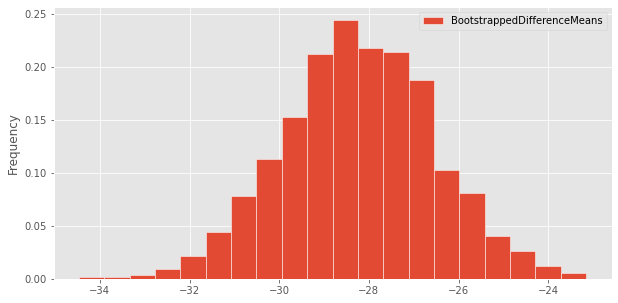

In [ ]:
bpd.DataFrame().assign(BootstrappedDifferenceMeans = difference_means).plot(kind = 'hist', density=True, ec='w', bins=20, figsize=(10, 5));

**Question 4.3.** Compute a 95% confidence interval for the difference in mean times (as before, in the order Ciro minus Athu). Assign the left and right endpoints of this confidence interval to `left_endpoint` and `right_endpoint` respectively.

In [ ]:
left_endpoint = difference_means.mean() - difference_means.std()
right_endpoint = difference_means.mean() + difference_means.std()

print('Bootstrapped 95% confidence interval for the mean difference in time to complete the crossword for Ciro and Athu:\n [{:f}, {:f}]'.format(left_endpoint, right_endpoint))

Bootstrapped 95% confidence interval for the mean difference in time to complete the crossword for Ciro and Athu:
 [-29.910121, -26.518227]


In [ ]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Based on the confidence interval you've created, would you reject the null hypothesis at the 0.05 significance level? Set `reject_null` to True if you would reject the null hypothesis, and False if you would not.

<h1>TUITION the difference is time was attributedd to RANDOMNESS not chance

In [ ]:
reject_null = False

In [ ]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** What if Ciro and Athu collected their times in minutes instead of seconds? Would your hypothesis test still come to the same conclusion either way? Set `same_conclusion` to True or False.

In [ ]:
same_conclusion = True

In [ ]:
grader.check("q4_5")

q4_5 results: All test cases passed!

## Finish Line: Almost there, but make sure to follow the steps below to submit! 🏁

**_Citations:_** Did you use any generative artificial intelligence tools to assist you on this assignment? If so, please state, for each tool you used, the name of the tool (ex. ChatGPT) and the problem(s) in this assignment where you used the tool for help.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Please cite tools here.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Congratulations! You are done with Homework 6 – the final homework of the quarter! 🎉

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [ ]:
grader.check_all()